# Insurance Data Analysis 

**As part of this project, we will be analysing insurance data to get answer to following questions

a. Do charges of people who smoke differ significantly from the people who don't?
b. Does bmi of males differ significantly from that of females?
c. Is the proportion of smokers significantly different in different genders?
d. Is the distribution of bmi across women with no children, one child and two children, the same ?



In [3]:
#Importing the librarirs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load the data into the dataframe
Insu  = pd.read_csv('insurance.csv') 
Insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Now we will perform basic EDA on the data to get more clarity on what are we dealing with

In [18]:
#Shape of the data
print(Insu.shape, "\n")

# Checking the data types of the data
print(Insu.info())

(1338, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
None


In [72]:
Insu['sex'] = Insu.sex.astype('category')
Insu['smoker'] = Insu.smoker.astype('category')
Insu['region'] = Insu.region.astype('category')
print(Insu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null category
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null category
region      1338 non-null category
charges     1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB
None


In [19]:
## Count the variables
Insu.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

In [20]:
## Checking missing values
Insu.isnull().sum().sort_values(ascending=False) 

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

**It looks like we have a clean data

In [21]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(Insu)

,Total,Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


**Our numerical columns are age, bmi, children, charges. Lets check 5 point summary of numerical attributes.

In [24]:
#Creating a dataset of just numerical variables 
num_data=Insu[["age","bmi","children","charges"]]
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [73]:
#Checking skewness of the data
num_data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">  Five Number Summary
<font color=Black>

The five number summary helps describe the center, spread and shape of data. The five summary statistics are as follows,

* Minimum
* Q1
* Q2
* Q3
* Maximum

In [34]:
#Minimum
print(num_data.min()) 

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64


In [36]:
#Q1
print("Data_quantile(25%): \n",num_data.quantile(q=0.25)) 

Data_quantile(25%): 
 age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


In [37]:
#Q2
print("Data_quantile(50%): \n",num_data.quantile(q=0.50)) 

Data_quantile(50%): 
 age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


In [38]:
#Q3
print("Data_quantile(75%): \n",num_data.quantile(q=0.75))

Data_quantile(75%): 
 age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


In [39]:
#Maximum
print(num_data.max()) 

age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64


## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:Black;">  Data Plot
<font color=Black>
    To get better insights, lets plot the data

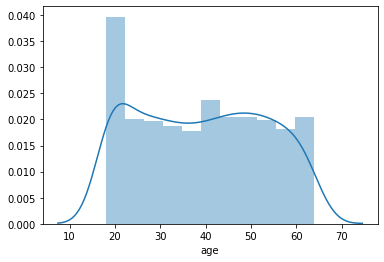

In [60]:
import seaborn as sns
sns.distplot(num_data["age"]);


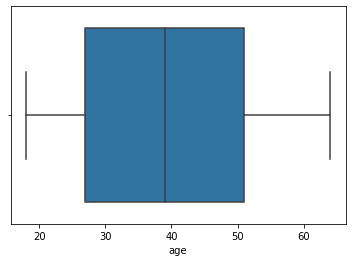

In [54]:
sns.boxplot(x="age",data=num_data)

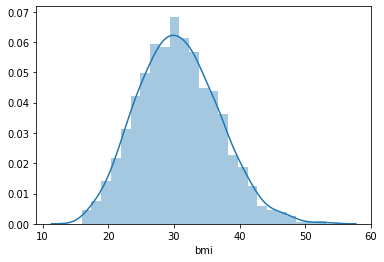

In [55]:
#bmi
sns.distplot(num_data["bmi"]);

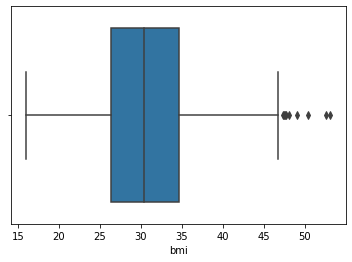

In [56]:
sns.boxplot(x="bmi",data=num_data)

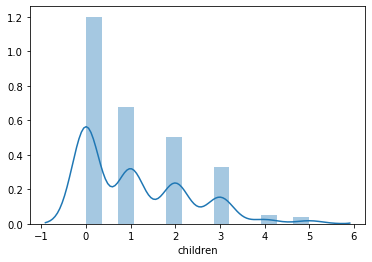

In [57]:
sns.distplot(num_data["children"]);

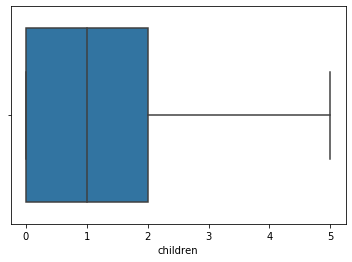

In [58]:
sns.boxplot(x="children",data=num_data)

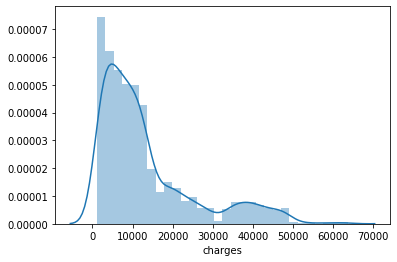

In [61]:
sns.distplot(num_data["charges"]);

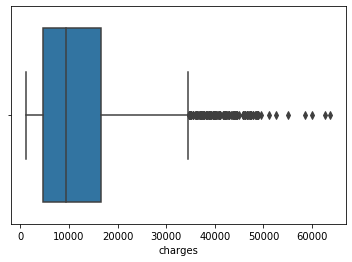

In [62]:
sns.boxplot(x="charges",data=num_data)

## <span style="font-family: Arial; font-weight:bold;font-size:0.75em;color:Blue;">  Insights
<font color=Black>
    <br>1. Distribution of age and bmi column is normal 
    <br>2.Distriburion of children and charges is right skewed. 
    <br>3. While there are no outliers in age, there are few upper outliers in bmi and many upper outliers in charges. 
  <br>This was univariate analysis for numerical data. 

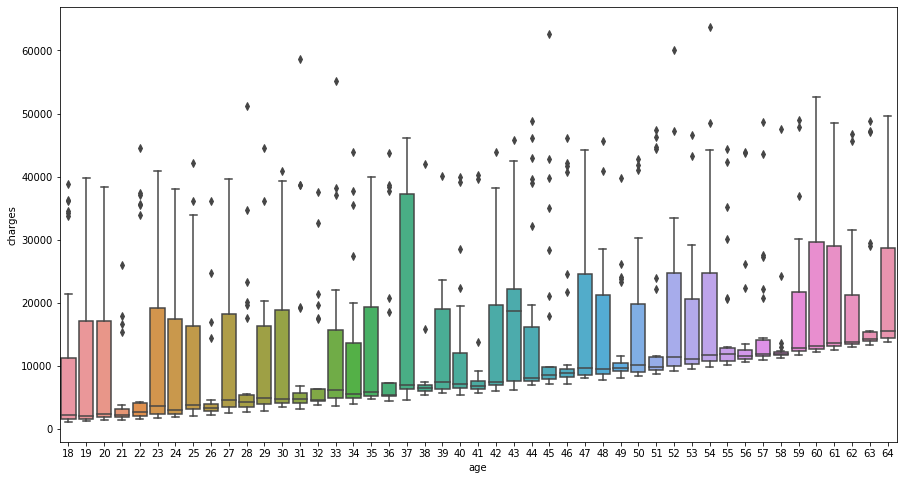

In [67]:
plt.figure(figsize=(15,8))  # setting the figure size
ax = sns.boxplot(x='age', y='charges', data=Insu)  # boxplot

sex
female    662
male      676
Name: sex, dtype: int64


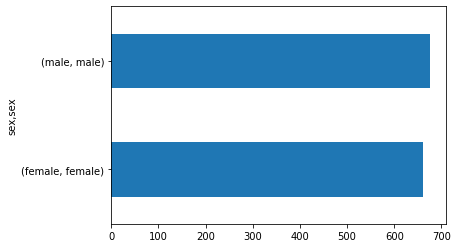

In [77]:
#Distribution of categorical columns
print(Insu.groupby('sex')['sex'].count()) 
Insu.groupby('sex').sex.value_counts().plot.barh()

smoker
no     1064
yes     274
Name: smoker, dtype: int64


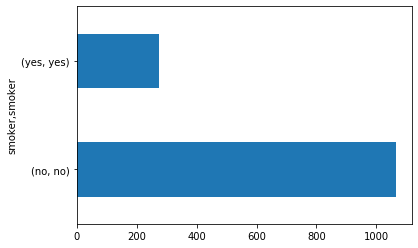

In [78]:
print(Insu.groupby('smoker')['smoker'].count()) 
Insu.groupby('smoker').smoker.value_counts().plot.barh()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64


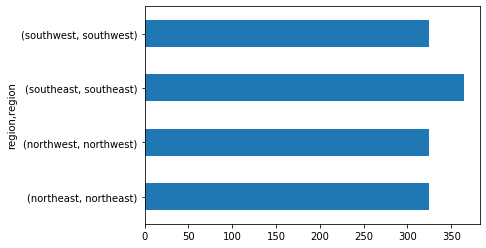

In [79]:
print(Insu.groupby('region')['region'].count()) 
Insu.groupby('region').region.value_counts().plot.barh()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


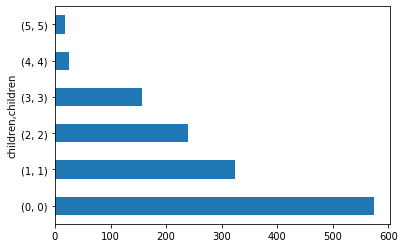

In [80]:
print(Insu.groupby('children')['children'].count()) 
Insu.groupby('children').children.value_counts().plot.barh()

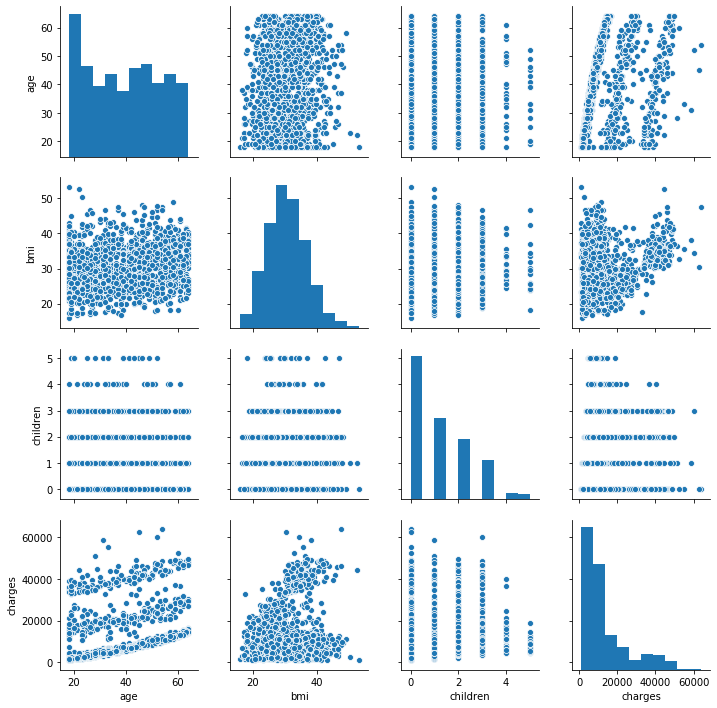

In [81]:
#pairplot
sns.pairplot(Insu)

## <span style="font-family: Arial; font-weight:bold;font-size:0.75em;color:Black;">  Scenarios
<br>**1. Do charges of people who smoke differ significantly from the people who don't?**

In [86]:
print(Insu.groupby('smoker')['smoker'].count()) 

smoker
no     1064
yes     274
Name: smoker, dtype: int64


In [107]:
# So we have p1 as non smoker population = 1064
# and p2 with smoker population as 274
# Population: People in the data
# Parameter of Interest: mu1 - mu2 charges

# Null Hypothesis: mu1 = mu2
# Alternative Hypthosis: mu1 != mu2
import statsmodels.api as sm

smokers = Insu[Insu["smoker"] == "yes"]
nonsmokers = Insu[Insu["smoker"] == "no"]

n1=len(smokers)
mu1 = smokers["charges"].mean()
sd1 = smokers["charges"].std()

print(n1,mu1,sd1)

n2=len(nonsmokers)
mu2 = nonsmokers["charges"].mean()
sd2 = nonsmokers["charges"].std()

print(n2,mu2,sd2)

sm.stats.ztest(smokers["charges"], nonsmokers["charges"], alternative='two-sided')

274 32050.23183153285 11541.547175589121
1064 8434.268297856199 5993.781819194933


(46.664921172723716, 0.0)

In [109]:
#Since it's comparison of two means,we can run t-sample test also to confirm the findings 

sm.stats.ttest_ind(smokers["charges"], nonsmokers["charges"])

(46.66492117272371, 8.271435842179102e-283, 1336.0)

**Conclusion**
<br>p value is **very** small so we can reject null hypothesis and means the smokers do have high charges.

 **2. Does bmi of males differ significantly from that of females?**

In [110]:
print(Insu.groupby('sex')['sex'].count()) 

sex
female    662
male      676
Name: sex, dtype: int64


In [111]:
# So we have p1 as male population = 676
# and p2 with female population as 662
# Population: People in the data
# Parameter of Interest: mu1 - mu2 charges

# Null Hypothesis: mu1 = mu2
# Alternative Hypthosis: mu1 != mu2

male= Insu[Insu["sex"] == "male"]
female = Insu[Insu["sex"] == "female"]

n1=len(male)
mu1 = male["bmi"].mean()
sd1 = male["bmi"].std()

print(n1,mu1,sd1)

n2=len(female)
mu2 = female["bmi"].mean()
sd2 = female["bmi"].std()

print(n2,mu2,sd2)

sm.stats.ztest(male["bmi"], female["bmi"], alternative='two-sided')

676 30.943128698224832 6.140434615792248
662 30.377749244713023 6.046023085745338


(1.6967526357522242, 0.08974343679943912)

**Conclusion**
<br>p value here 0.08 > 0.05 so we can not reject null hypothesis. That means there is no difference in BMI genderwise.

**3. Is the proportion of smokers significantly different in different genders?**

In [122]:
#Difference in population proportion needs t-test. Also, the population follow a binomial distribution here. 
#We can just pass on the two population quantities with the appropriate binomial distribution parameters to the t-test function.

male= Insu[Insu["sex"] == "male"]
female = Insu[Insu["sex"] == "female"]

n1=len(male)
n2=len(female)

#null hypothesis states that p1 = p2  where p1 is the proportion of male smokers and p2 is proportion of female smokers
p1=len(male[male["smoker"] == "yes"])/n1
p2=len(female[female["smoker"] == "yes"])/n2
print(p1,p2)

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

sm.stats.ttest_ind(population1, population2)

0.23520710059171598 0.17371601208459214


(3.486667203845064, 0.0005049363456233408, 1336.0)

**Conclusion**
<br>p value here 0.01 < 0.05 so we reject null hypothesis. That means there is significant difference in proportion of smokers genderwise.

**4. Is the distribution of bmi across women with no children, one child and two children, the same ?**

In [129]:
# Here we are comparing multiple groups, we will be using ANOVA
from scipy import stats
data1=Insu[Insu["sex"] == "female"]

p1=data1[data1["children"] == 0 ]
p2=data1[data1["children"] == 1 ]
p3=data1[data1["children"] == 2 ]


F, p = stats.f_oneway(p1['bmi'], p2['bmi'], p3['bmi'])
print(F,p)

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.3344720147757968 0.7158579926754841
p-value for significance is:  0.7158579926754841
accept null hypothesis


**Conclusion**
<br>p value here is quite high so we can not reject null hypothesis. That means there is no significant difference in proportion of bmi in women with difference in number of children.